In [2]:
## Import all diferent libraries
import os, sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import numpy as np
import pandas as pd
import glob
import yaml
import pprint
import matplotlib
from datetime import datetime
from scipy.stats import ttest_ind
import seaborn as sns
from matplotlib import pyplot as plt
import re
from src import plotter as plotter
plotter.initialize(plt)

In [39]:

file = '~/research/data/UMBL2022FEB_CELL152098_FORMFAST_2_P45C_5P0PSI_20220902_R1.csv'
file1 = '~/research/data/keyence_20220901_213928.csv'
df = pd.read_csv(file)
df1 = pd.read_csv(file1)
df1['computer time']
df['Timestamp'].astype('datetime64[ns]')
df1['computer time'].astype('datetime64[ns]')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df1['computer time']=pd.to_datetime(df1['computer time'],unit='s')

In [40]:
df['Timestamp']= df['Timestamp'].apply(lambda x : x.tz_localize(None))

In [41]:
df1['computer time'] = df1['computer time'].apply(lambda x : x.tz_localize(None))

In [42]:
df1 = df1.loc[(df1['computer time'] > df['Timestamp'][0]) & (df1['computer time'] < df['Timestamp'][df.shape[0]-1])]
df1['Key_CH2'] = df1['Key_CH2'] - df1['Key_CH2'].iloc[0]
df1.dropna()
df.dropna()

,[Arbin] AC Impedance (Ω),[Arbin] AC Impedance Phase Angle (°),[Arbin] Charge Capacity (Ah),[Arbin] Charge Energy (Wh),[Arbin] Current (A),[Arbin] Cycle Number,[Arbin] Datapoint Number,[Arbin] Date Time (excel format),[Arbin] Discharge Capacity (Ah),[Arbin] Discharge Energy (Wh),...,Current (A),Cycle Number,Datapoint Number,Timestamp,Discharge Capacity (Ah),Discharge Energy (Wh),Potential (V),Step Index,Step Time (s),Test Time (s)
1,0.0,0.0,0.0,0.0,0.0,1,2,44806.438704,0.0000,0.000000,...,0.0,1,2,2022-09-02 14:31:44,0.0000,0.000000,0.847764,1,10.061750,10.061750
3,0.0,0.0,0.0,0.0,0.0,1,4,44806.438935,0.0000,0.000000,...,0.0,1,4,2022-09-02 14:32:04,0.0000,0.000000,0.847926,1,30.099158,30.099158
6,0.0,0.0,0.0,0.0,0.0,1,7,44806.439282,0.0000,0.000000,...,0.0,1,7,2022-09-02 14:32:34,0.0000,0.000000,0.847764,1,60.139996,60.139996
7,0.0,0.0,0.0,0.0,0.0,1,8,44806.439398,0.0000,0.000000,...,0.0,1,8,2022-09-02 14:32:44,0.0000,0.000000,0.847926,1,70.154658,70.154658
9,0.0,0.0,0.0,0.0,0.0,1,10,44806.439630,0.0000,0.000000,...,0.0,1,10,2022-09-02 14:33:04,0.0000,0.000000,0.847764,1,90.196289,90.196289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42748,0.0,0.0,0.0,0.0,0.0,42,42749,44810.590972,2.4611,9.009053,...,0.0,42,42749,2022-09-06 18:11:00,2.4611,9.009053,3.244510,30,21538.146378,358723.916999
42749,0.0,0.0,0.0,0.0,0.0,42,42750,44810.591088,2.4611,9.009053,...,0.0,42,42750,2022-09-06 18:11:10,2.4611,9.009053,3.244348,30,21548.177361,358733.947982
42750,0.0,0.0,0.0,0.0,0.0,42,42751,44810.591204,2.4611,9.009053,...,0.0,42,42751,2022-09-06 18:11:20,2.4611,9.009053,3.244510,30,21558.200426,358743.971047
42754,0.0,0.0,0.0,0.0,0.0,42,42755,44810.591667,2.4611,9.009053,...,0.0,42,42755,2022-09-06 18:12:00,2.4611,9.009053,3.244673,30,21598.288198,358784.058819


<function matplotlib.pyplot.legend(*args, **kwargs)>

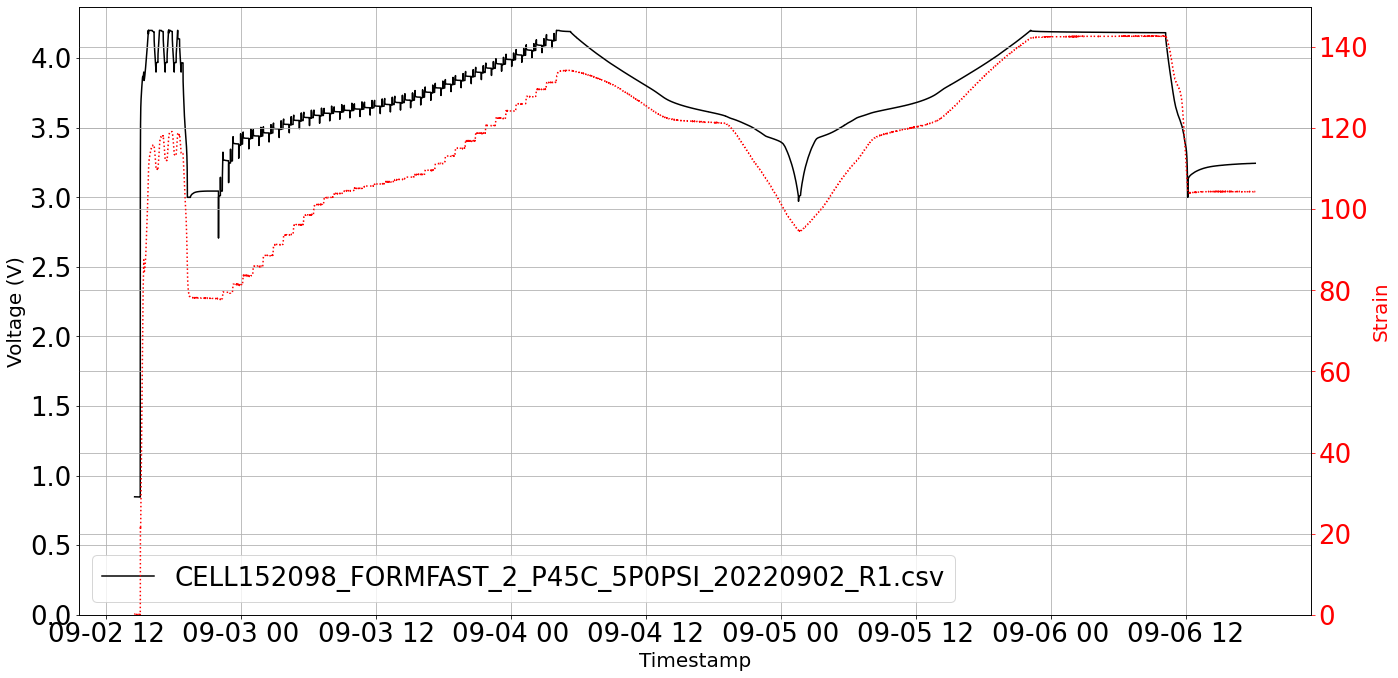

In [44]:
plt.figure(figsize=(20,10))
plt1 =plt.subplot()
plt2=plt1.twinx()
plt1.plot(matplotlib.dates.date2num(df['Timestamp']), df['Potential (V)'], color= 'k', label=file[28:])
plt2.plot(df1['computer time'], df1['Key_CH2'], color= 'r', ls =':', markersize=0.1, label=file[28:])
plt1.set_xlabel("Timestamp", fontsize=20)
plt1.set_ylabel("Voltage (V)", fontsize=20)
plt2.set_ylabel("Strain", fontsize=20)
plt2.tick_params(axis='y', colors='r')
plt2.yaxis.label.set_color('red')
plt1.legend(loc=0)
plt1.set_ylim(bottom=0)
plt2.set_ylim(bottom=0)
plt.legend

In [57]:
def Quantity(df):
    cycles_num=np.unique(df['cycle number'])
    Time=[]
    Voltage=[]
    Current=[]
    #Resistance=[]
    Capacity_T=[]
    Capacity_C=[]
    for a in cycles_num:
        i=np.where(df['cycle number']==a)
        for d in i[0][1:-1]:
            if df.loc[d,'I/mA']<0:
                time1= df.loc[d-1, 'time/s']
                time2= df.loc[d, 'time/s']
                current_=abs(df.loc[d, 'I/mA'])
                Capacity_T.append(current_*(time2-time1)/3600) 
        Capacity_C.append(np.sum(Capacity_T))
        Capacity_T.clear    
    return Capacity_C

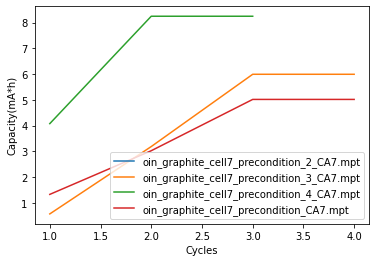

In [67]:
plt.figure()
plt.xlabel('Cycles')
plt.ylabel('Capacity(mA*h)')
for file1 in file_paths[0]:
    k=np.where(file_paths[0]== file1)
    num_header_lines = 106
    df = pd.read_csv(file1, header=num_header_lines, sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-1 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-2 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-3 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-5 , sep='\t', encoding='ISO-8859-1')
    Capacity= Quantity(df)
    Cycles=range(len(Capacity)+1)
    plt.plot(Cycles[1:], Capacity, label=file1[67:])
plt.legend()


##### 